# Abstract  

The fat content of the human body has physiological and medical importance. It may influence morbidity and mortality, it may aIter the effectiveness of drugs and anaesthetics, and it may affect the ability to withstand exposure to cold and starvation. Thus the measurement of the total body fat provides useful information. However, accurate measurement of body fat is inconvenient and it is desirable to have easy methods of estimating body fat that are not costly. 

In this article, we used a data set of adult men, with which we did data cleaning, model selection regression analysis and finally found a equation. Given the length of chest, abdomen and wrist, age and adiposity, this equation will tell us the body fat. For doctors, the data needed are easy to acquire and the equation are not difficult to utilize. Therefore the equation can be very helpful when doctors serve for patients.

# Data description
The data set we use contains measurements of 252 men's percentage of body fat and various body circumference measurements. In particular, we have age, weight, height, adiposity and circumferences of neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm and wrist.

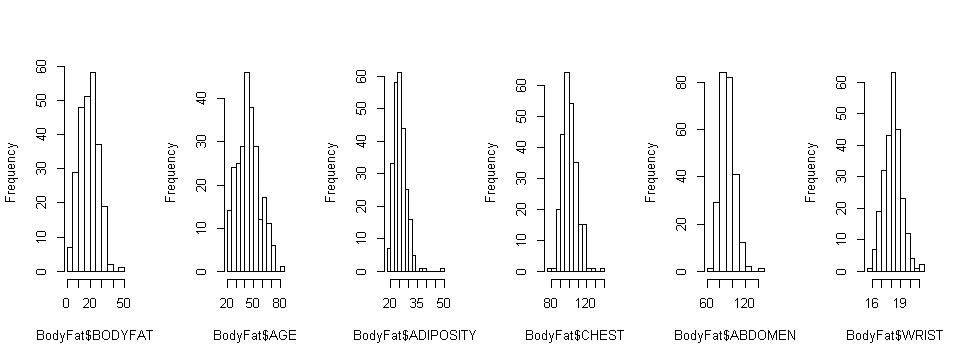

In [434]:
setwd("E:/wisc/628/module 1");BodyFat <- read.csv("BodyFat.csv");BodyFat[,6] = BodyFat[,6]*2.54;layout(matrix(1:6,ncol=6));options(repr.plot.width=8, repr.plot.height=3)
hist(BodyFat$BODYFAT,main="");hist(BodyFat$AGE,main="");hist(BodyFat$ADIPOSITY,main="",breaks=20);hist(BodyFat$CHEST,main="");hist(BodyFat$ABDOMEN,main="");hist(BodyFat$WRIST,main="")

# Data cleaning

In [387]:
BodyFat[182,]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,182,0,1.1089,40,118.5,172.72,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


As we all know, a human's bodyfat can't be 0, so before doing anything we need to check whether our data set has that unrealistic problem. We found out the 182th data set actually has bodyfat equals 0. Based on the equation $100\text{Bodyfat}=-450+\frac{495}{\text{Density}}$ we want to use the value of density to get the value of bodyfat, but as we try to use the equation above what we get is a negative boayfat value -3.612. Since we needs our data to be meaningful here we delete the whole 182th data set

Since density is hard to measure which means its value is not precise and what we interested is bodyfat so that we delete the density part of our data.We need to do some data cleaning first. Notice that there are some points outside of the cloud of data, which means they are outlier candidates, that is, either leverage points or outliers in Y.

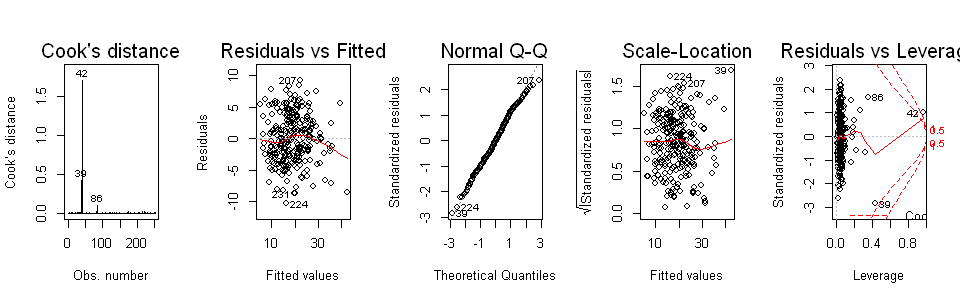

In [388]:
model0 = lm(BODYFAT~.,data=BodyFat[-182,c(-1,-3)])
layout(matrix(1:5, ncol=5));plot(model0,which=4);plot(model0);options(warn=-1)
options(repr.plot.width=7, repr.plot.height=1)

In [389]:
BodyFat[42,]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,42,31.7,1.025,44,205,74.93,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


We noticed the fact that the cook's distance of 42th data is very large. The rule of thumb is we classify as leverages anything above 4/(n-p). So the 42the data is a high leverage point and we consider it as a potential outlier. Then we go back to the raw data and find out the hight is 29.5 which is extremely low. Since we want our model to be representative and a man with that height is abnormal so we decide to delete this point.

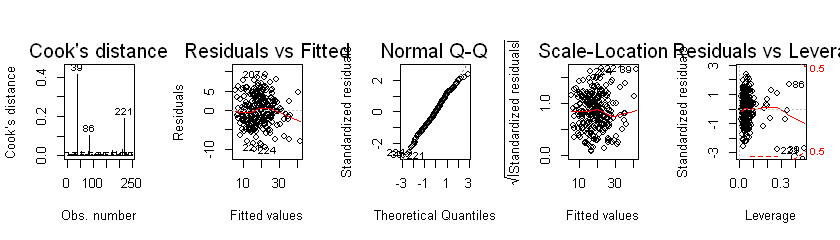

In [390]:
layout(matrix(1:5, ncol=5));options(repr.plot.width=7, repr.plot.height=2);
plot(model1,which=4);abline(h=4/(250-14),lty=2);plot(model1)

In [391]:
BodyFat[39,]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,183.515,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


After we delete the 42th point the 39th point seems to be a potential outlier, then we look back to the raw data and find out the 39th data has weight of 363.15 which is abnormal. In order to not violate our purpose of finding a general model we also delete this point.

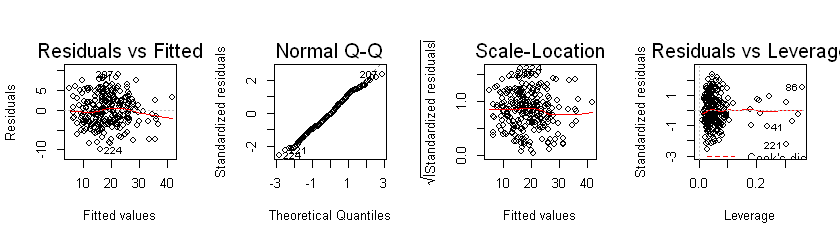

In [392]:
model2 <- lm(BODYFAT~., data=BodyFat[-c(39,42,182),c(-1,-3)]);layout(matrix(1:4, ncol=4));options(repr.plot.width=7, repr.plot.height=2);plot(model2)

In [393]:
bodyfat<-BodyFat[-c(39,42,182),c(-1,-3)]
bodyfat[c(86,224,221,207),]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
88,22.6,64,160.00,167.005,26.0,36.5,104.3,90.9,93.8,57.8,39.5,23.3,29.2,28.4,18.1
227,14.9,55,169.50,173.355,25.6,37.2,101.7,91.1,97.1,56.6,38.5,22.6,33.4,29.3,18.8
224,6.1,55,142.25,170.815,22.2,35.2,92.7,82.8,91.9,54.4,35.2,22.5,29.4,26.8,17.0
210,11.3,47,159.75,179.705,22.5,34.5,92.9,84.4,94.0,56.0,38.2,22.6,29.0,26.2,17.6


The set c(86,224,221,207) still shows up as outliers. They also seem to be outside of the bands then we go back to the raw data and see what’s the problem with these points. But actually those data are pretty reasonable we can’t simply delete any data so we decide to keep those data.

First we try to use criteria Mallow’s cp and adjusted R2 to select model but turns out the results is not very good and keeps so many variables or it has variables which is not significance. Based on the goal of simplicity we don’t use those models.
# Variable selection and model analysis

In [421]:
model = lm(BODYFAT~.,data=bodyfat);model.AIC <- step(model, k=2,trace = 0);anova(model.AIC)
cat("R square =",round(summary(model.AIC)$adj.r.squared,2)," MSE =",round(anova(model.AIC)$`Mean Sq`[9],2))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
AGE,1,1227.23825,1227.23825,80.0315787,1.021718e-16
ADIPOSITY,1,7217.60464,7217.60464,470.6798305,1.676548e-58
NECK,1,191.74745,191.74745,12.5043782,4.871402e-04
CHEST,1,34.80799,34.80799,2.2699246,1.332214e-01
ABDOMEN,1,1606.33013,1606.33013,104.7532014,1.231361e-20
HIP,1,140.24580,140.24580,9.1458141,2.763730e-03
FOREARM,1,6.59588,6.59588,0.4301354,5.125507e-01
WRIST,1,231.49456,231.49456,15.0963962,1.321898e-04
Residuals,240,3680.26204,15.33443,NA,NA


R squared = 0.73  MSE = 15.33

Here, the result of stepwise using AIC as criterion shows that eight variables are selected out. P-values of age, adiposity, chest, abdomen, wrist are smaller than 0.05; neck, hip have p-values which are smaller than 0.1. And the eight varibles together can explain 73% of the total variation. Besides, mean squared error of this model is 15.3.

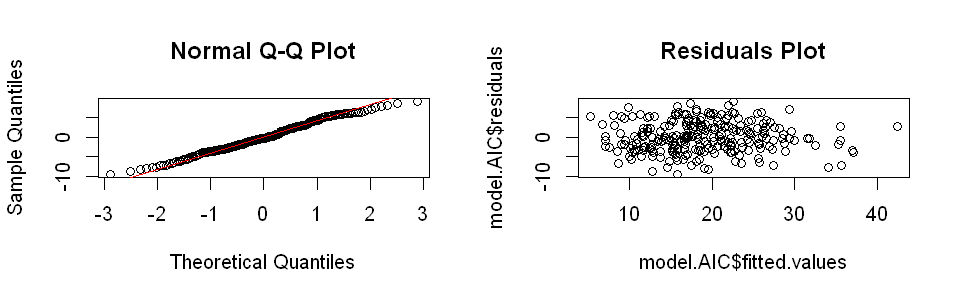

In [396]:
options(repr.plot.width=8, repr.plot.height=2.5);layout(matrix(1:2,ncol=2));
qqnorm(model.AIC$residuals);qqline(model.AIC$residuals, col = "red");plot(model.AIC$fitted.values,model.AIC$residuals, main = "Residuals Plot")

QQ-plot shows that the residuals satisfy the normal distribution requirement.

We also used BIC as the criterion in stepwise, five variable are seleted out as a result.

In [423]:
model.BIC <- step(model, k=log(249),trace=0);anova(model.BIC)
cat("R square =",round(summary(model.BIC)$adj.r.squared,2)," MSE =",round(anova(model.BIC)$`Mean Sq`[6],2))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
AGE,1,1227.238254,1227.238254,78.6026123,1.663978e-16
ADIPOSITY,1,7217.604641,7217.604641,462.2758271,3.758686e-58
CHEST,1,1.778667,1.778667,0.1139207,7.360152e-01
ABDOMEN,1,1576.324765,1576.324765,100.9610349,4.325031e-20
WRIST,1,519.372979,519.372979,33.2649938,2.434005e-08
Residuals,243,3794.007441,15.613199,NA,NA


R square = 0.73  MSE = 15.61

All the five varibles are statistically significant with p-values smaller that 0.05. These five varibles together can explain 72.99% to the total variation. Besides, mean square error of this model is 15.61.

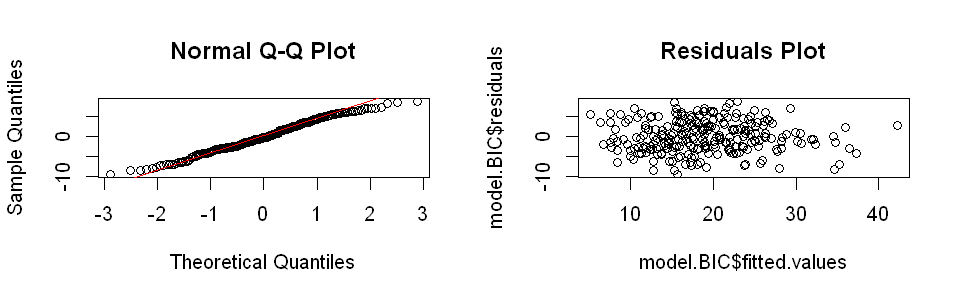

In [400]:
options(repr.plot.width=8, repr.plot.height=2.5);layout(matrix(1:2,ncol=2))
qqnorm(model.BIC$residuals); qqline(model.BIC$residuals, col = "red");plot(model.BIC$fitted.values,model.BIC$residuals, main = "Residuals Plot")

QQ-plot shows that the residuals satisfy the normal distribution requirement.

Comparing the two models, BIC contains variables three less than AIC method, but has the almost same R-square and MSE with AIC. Thus, we'd like to use the model generated based on BIC as our final model, which is **
**$$BODYFAT = 0.0797AGE + 0.5329ADIPOSITY - 0.2211NECK + 0.7044ABDOMEN - 2.0945WRIST - 2.8048$$ 

And the coefficients confidence intervals are as following.

In [401]:
rbind(low = coef.BIC[,1] - qnorm(p = 0.975) * coef.BIC[,2], high = coef.BIC[,1] + qnorm(p = 0.975) * coef.BIC[,2])

,(Intercept),AGE,ADIPOSITY,CHEST,ABDOMEN,WRIST
low,-13.943524,0.03806503,0.1025636,-0.39196715,0.5649153,-2.806277
high,8.333949,0.12134463,0.9632695,-0.05026772,0.8438958,-1.382745


Therefore, in our model, if age goes up by one year in average, the bodyfat will increases
0.0797 unit; if adiposity increases by one unit in average, bodyfat will increase 0.5329 unit; if
neck circumference increases by one centimeter in average, bodyfat will decrease 0.2211 unit;
if abdomen circumference increases by one centimeter in average, bodyfat will increase 0.7044
unit; if wrist circumference increases by one centimeter in average, bodyfat will decrease
2.0945 unit.

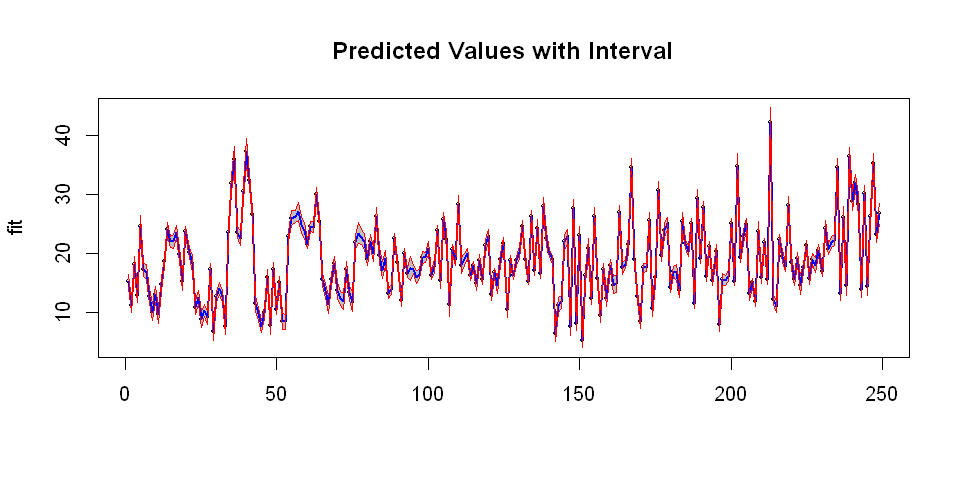

In [411]:
options(repr.plot.width=8, repr.plot.height=4)
model.BIC.pre = data.frame(predict(model.BIC,interval="confidence"));model.BIC.pre$x = seq(nrow(model.BIC.pre))
plot(fit ~ x, data = model.BIC.pre, ylim = range(c(model.BIC.pre$lwr,model.BIC.pre$upr)), main = "Predicted Values with Interval",cex=0.5,xlab="")
with(model.BIC.pre, polygon(c(x,rev(x)), c(lwr,rev(upr)),col = "grey75", border = FALSE))
matlines(model.BIC.pre[,4], model.BIC.pre[,-4], lwd=c(2,1,1),lty=1,col=c("blue","red","red"))

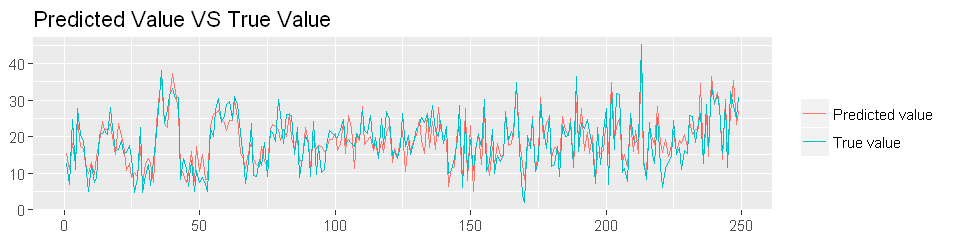

In [407]:
library(ggplot2);options(repr.plot.width=8, repr.plot.height=2);ggplot()+geom_line(aes(c(1:249,1:249),c(model.BIC.pre$fit,bodyfat$BODYFAT),color=as.factor(rep(c("Predicted value","True value"),each=249))))+
theme(legend.title=element_blank(),axis.title=element_blank())+ggtitle("Predicted Value VS True Value")

# Conclusion and model evaluation  
Our Proposed SLR Model is:$$BODYFAT=-3+0.08AGE+0.5ADIPOSITY-0.2CHEST+0.7ABDOMEN-2WRIST$$
**Possible rule of thumb**: "0.08 times age(year), plus 0.5 times adiposity(BMI), minus 0.2 times chest circumstance(cm), plus 0.7 times abdomen circumstance(cm), minus 2 times wrist circumstance(cm), minus 3."  
**Example Usage:**"Take the 37st person in the sample data as an example, with age 40 years old, BMI 29.1, chest circumstance 106.5cm, abdomen circumstance 100.9cm, and wrist circumstance 19.0cm, then his predicted body fat percentage will be 23.62 while the true value is 23.6. There is a 95% probability that his body fat is between 22.72 and 24.51."  

"With the rule of thumb, you get about 25.08 as the predicted body fat with our simplified model."  
**Inference about Relationship: **There is clearly a linear relationship between age, adiposity, chest, abdomen and wrist and this relationship is significant at the alpha=0.05 level (with p-value $2.2*10^{-16}$). These five variables explain about 72.99% of all the variation in body fat %.  
**Strength and Weakness**  
***Strength:*** *1.*The model contains only few variables, which greatly reduces doctors’ measuring job.*2.*A big enough R square, as well as a small MSE, indicating our model is effective for prediction. *3.*Eliminates influential outliers to ensure the efficiency of the sample data. *4.*The effect of prediction is good with a relative small MSE. *5.*All variables selected are statistically significant.  
***Weakness:*** *1.*Length unit is centimeter, doctors may need to do the length transformation. Multicollinearity exists, but principle component here doesn’t perform better. *2.* There are indeed some other factors related to body fat, like water balance and bone index, which are not examined in our data, thus, it’s hard for us to explain some coefficients in our final model.


Overall, our model provides a very simple way of guessing the body fat% based on AGE, ADIPOSITY, CHEST, ABDOMEN and WRIST. However, because of this simplicity, our predictions aren’t very precise, and because of the multicollinearity, the coefficients of WRIST and CHEST are not that reasonable.  

**Contribution**  
*Jing Guo*: Slides; model building; model interpretation  
*Jiayin Wang*: Data cleaning; prediction; model interpretation  
*Wenqin Xiong*: Jupyter notebook; model building; model interpretation  
*Shaodong Wang*: Jupyter notebook; prediction; model interpretation  